<a href="https://colab.research.google.com/github/DenicaKj/VNP/blob/main/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<font size = 4 color='Orange'>
Learning Goals</font>

<font color = 'Orange' size = 3 >In this Exercise your goal is to make a good solution for the active competition on kaggle: https://www.kaggle.com/c/nlp-getting-started/data

<font color = 'Orange' size = 3 > In order to download the Datasets you will need to join and accept the terms and conditions of the competition. </font>

You need to report the parameters for the best three models into a table that will contain the model architecture and F1 score.
</font>

<font color = 'Blue' size = 4 > Structure of the Dataset </font>

<font color = 'Orange' size = 3>
The Dataset it's divided on two parts for training and testing. For the testing part you need to map the id's with the sample_submission.csv, where the target column is located.</li>
</font>

<font color = 'Blue' size = 4 >FIRST PART</font>

<font color = 'Orange' size = 3 > Choose a model that you will use from the pretrained BERT, RoBERTa, XLNet, XLM ... models for Text Classification [Hugging Face](https://huggingface.co/transformers/quicktour.html). 

Report the following parameters for models based on Transformers</font>
<ul>
<font color='orange'>
<li> Pretrained model</li>

<li>Loss function</li>
<li>Optimizer function for compiling</li>
<li>F1 score for the prediction of the test part (this is the metric for rating the models)
</li>
</ul>
<font color = 'Blue' size = 4 >SECOND PART</font>
<ul>
<font color='Orange'>
Cluster the tweets based on their embeddings using one of the clustering algorithms:

<li>K-Means Clustering</li>
<li>Agglomerative Clustering</li> 
<li>Affinity propagation Clustering</li> 
<li>Spectral Clustering</li> 
<li>DBSCAN Clustering</li>

</ul>

</font>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#First Part

In [7]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 115.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 24.0 MB/s eta 0:00:00


In [8]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 19.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [9]:
import pandas as pd

##Preprocessing

In [10]:
train=pd.read_csv('/content/drive/MyDrive/kolok/train.csv')

In [11]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

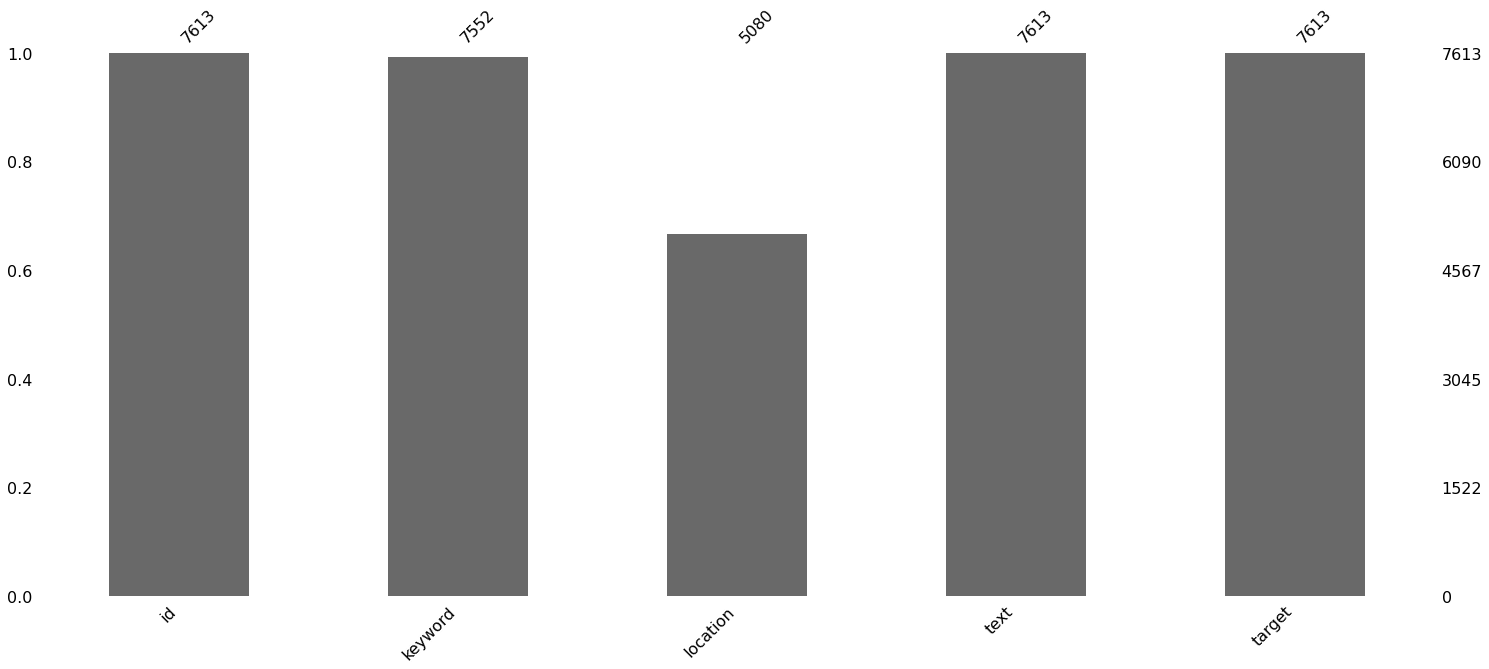

In [12]:
import missingno as msngo
msngo.bar(train)

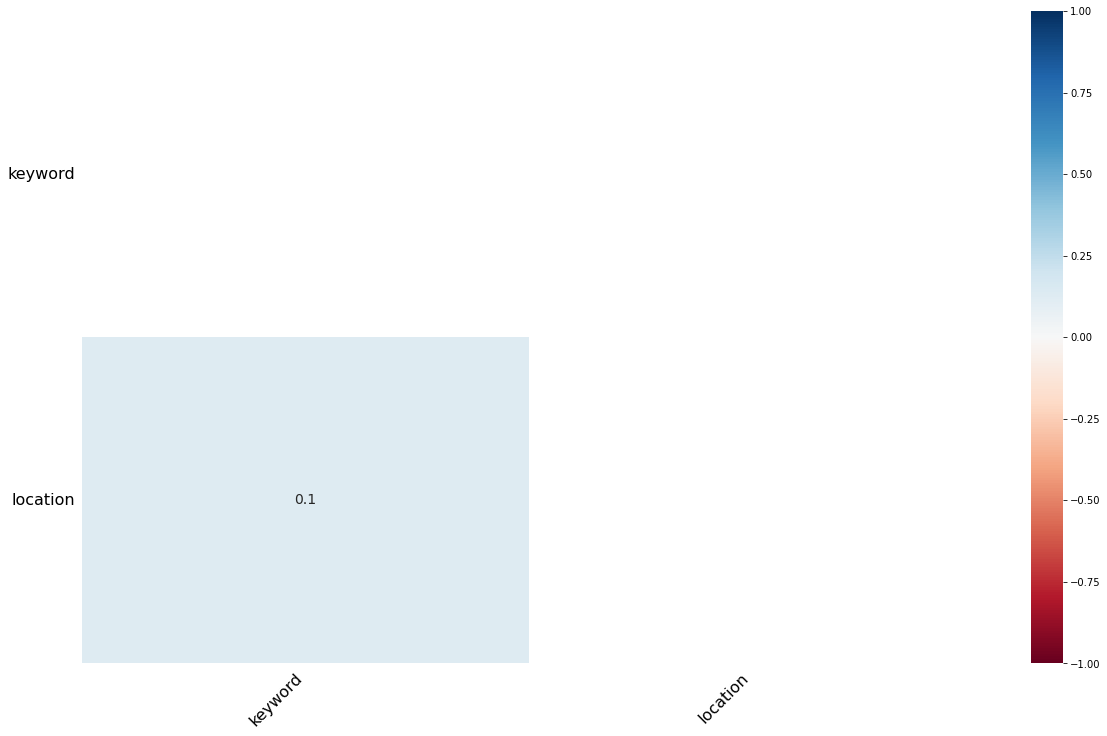

In [13]:
msngo.heatmap(train)

In [14]:
train=train.drop(['keyword','location','id'],axis=1)
train.rename(columns = {'target':'label'}, inplace = True)
train

,text,label
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [15]:
test=pd.read_csv('/content/drive/MyDrive/kolok/test.csv')
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

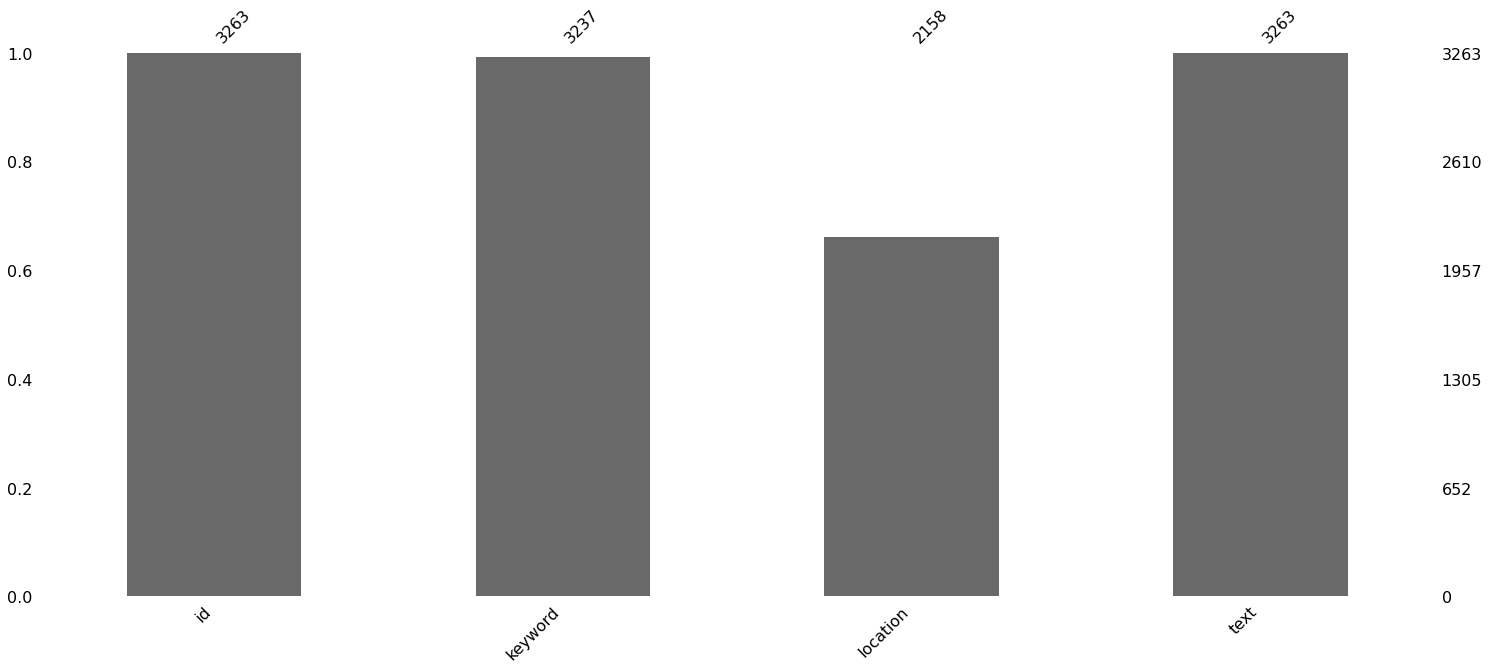

In [16]:
msngo.bar(test)

In [17]:
test=test.drop(['keyword','location'],axis=1)
test

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...
3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,Storm in RI worse than last hurricane. My city...
3260,10868,Green Line derailment in Chicago http://t.co/U...
3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [18]:
target=pd.read_csv('/content/drive/MyDrive/kolok/sample_submission.csv')
target

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [19]:
test=test.merge(target, left_on='id', right_on='id')
test=test.drop(['id'],axis=1)
test.rename(columns = {'target':'label'}, inplace = True)

In [20]:
train.to_csv('train_final.csv',index=False)
test.to_csv('test_final.csv',index=False)

##Encoding

In [50]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/vocab.txt
loading file to

In [51]:
dataset = load_dataset("csv", data_files={"train": "train_final.csv", "test": "test_final.csv"})

  0%|          | 0/2 [00:00<?, ?it/s]

In [52]:
encoded_dataset = dataset.map(lambda t: tokenizer(t['text'],  truncation=True), batched=True,load_from_cache_file=False)

  0%|          | 0/8 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

##Pretrained

In [53]:
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased',num_labels =2)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/pytorch_m

In [61]:
from transformers import TrainingArguments, Trainer
arg = TrainingArguments(
    "sentiment",
    learning_rate=5e-5,
    num_train_epochs=4,
    per_device_eval_batch_size=32,
    per_device_train_batch_size=32,
    seed=19
)
trainer = Trainer(
    model=model,
    args=arg,
    tokenizer=tokenizer,
    train_dataset=encoded_dataset['train'],
    eval_dataset=encoded_dataset['test']
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [62]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 7613
  Num Epochs = 4
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 952
  Number of trainable parameters = 109483778


Step,Training Loss
500,0.064300


Saving model checkpoint to sentiment/checkpoint-500
Configuration saved in sentiment/checkpoint-500/config.json
Model weights saved in sentiment/checkpoint-500/pytorch_model.bin
tokenizer config file saved in sentiment/checkpoint-500/tokenizer_config.json
Special tokens file saved in sentiment/checkpoint-500/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=952, training_loss=0.05144945513300535, metrics={'train_runtime': 321.2243, 'train_samples_per_second': 94.8, 'train_steps_per_second': 2.964, 'total_flos': 907927904839620.0, 'train_loss': 0.05144945513300535, 'epoch': 4.0})

##Evaluating

In [63]:
y_pred = trainer.predict(encoded_dataset['test'])
y_pred = y_pred.predictions

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 3263
  Batch size = 32


In [64]:
import numpy as np
y_pred = [np.argmax(y_pred[i]) for i in range(0,len(y_pred))]

In [65]:
import datasets
final = datasets.Dataset.from_dict({
    'id':target['id'],
    'target': y_pred
})

final.to_csv('final.csv', index=False)

Creating CSV from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

22746

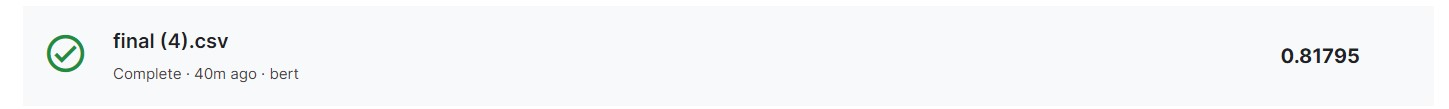

#Second Part

In [ ]:
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
message_embeddings = embed(train.text.values)

##KMeans

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

data = message_embeddings
pca = PCA(2)
 
df_new = pca.fit_transform(data)

In [ ]:
kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(df_new)

u_labels = np.unique(label)
 
labels = kmeans.labels_

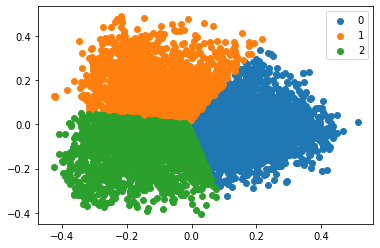

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = i)
    
plt.legend()
plt.show()

##Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(df_new, n_neighbors=10, include_self=False)
     

model = AgglomerativeClustering(n_clusters=3, connectivity=connectivity, linkage='ward').fit(df_new) 

In [ ]:
clusters = model.labels_.tolist()
model.labels_ 

array([0, 2, 0, ..., 2, 0, 2])

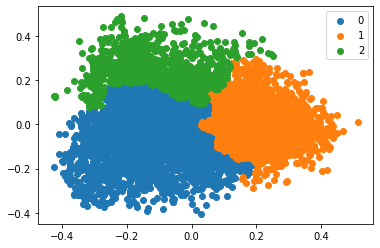

In [ ]:
label = model.fit_predict(df_new)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = i)
plt.legend()
plt.show()
     

In [ ]:
from sklearn import metrics
print('ARI '+ str(metrics.adjusted_rand_score(train['label'], model.labels_)))

ARI 0.12281250627469388


In [ ]:
print('AMI '+ str(metrics.adjusted_mutual_info_score(train['label'], model.labels_, average_method='arithmetic')))

AMI 0.12491654126033645


In [ ]:
print('Homogenity '+ str(metrics.homogeneity_score(train['label'], model.labels_)))

Homogenity 0.15114631005367624
